In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'malgunbd.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [2]:
# 웹 드라이버 초기화 (크롬 브라우저 사용 예시)
driver = webdriver.Chrome()  # chromedriver 경로 설정

company_list = []

for num in range(1, 3):
    time.sleep(2)
    url = f'https://www.saramin.co.kr/zf_user/jobs/list/job-category?cat_kewd=116&panel_type=&search_optional_item=n&search_done=y&panel_count=y&preview=y&page={num}&sort=AD'
    driver.get(url)
    
    # 웹 페이지가 로드될 때까지 대기
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.list_item')))
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    print(num, "페이지 조회중...")
    
    basic = soup.select('.list_item')

    for a in basic:
        try:
            _companyName = a.select_one("div.box_item > div.col.company_nm > a").text.strip()
            _locationName = a.select_one("div.col.recruit_info > ul > li:nth-child(1) > p").text.strip()
            _careerName = a.select_one("div.col.recruit_info > ul > li:nth-child(2) > p").text.strip()
            _schoolName = a.select_one("div.col.recruit_info > ul > li:nth-child(3) > p").text.strip()
            _jobName1 = a.select_one("span.job_sector > span:nth-child(1)").text.strip() if a.select_one("span.job_sector > span:nth-child(1)") else ''
            _jobName2 = a.select_one("span.job_sector > span:nth-child(2)").text.strip() if a.select_one("span.job_sector > span:nth-child(2)") else ''
            _jobName3 = a.select_one("span.job_sector > span:nth-child(3)").text.strip() if a.select_one("span.job_sector > span:nth-child(3)") else ''
            _jobName4 = a.select_one("span.job_sector > span:nth-child(4)").text.strip() if a.select_one("span.job_sector > span:nth-child(4)") else ''
            _jobName5 = a.select_one("span.job_sector > span:nth-child(5)").text.strip() if a.select_one("span.job_sector > span:nth-child(5)") else ''
            
            company_list.append((_companyName,_locationName,_careerName, _schoolName, _jobName1, _jobName2, _jobName3, _jobName4, _jobName5))
        except:
            continue

# 웹 드라이버 종료
driver.quit()

1 페이지 조회중...
2 페이지 조회중...


In [3]:
# DataFrame 생성 및 저장 (그대로 사용)
df = pd.DataFrame(company_list, columns=["Company", "Location", "Career", "School", "Job1", "Job2", "Job3", "Job4", "Job5"])

driver = webdriver.Chrome()
#driver = webdriver.Chrome('C:\\workspace\\chromedriver')
driver.get(r'https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45737108&recommend_ids=eJxNj7kRAzEMA6txzhcgYxfi%2FruwTvYdFe5gCQwDwg7Gp7RffAeUEiILdaMY1fGgJe1C%2B8nGhMWkdIffaTYE0JVio2mo8xlaVcmRiy3pd1UWKrf8b4ZrD2qCcuDqYo9sa7bOW6eNrOuHQfHQOmSToI5MI68UX10aQDM%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0')
driver.implicitly_wait(5)

name = driver.find_element(By.CLASS_NAME, "total")
count=int(name.text.replace('지원자수\n','').replace(',','').replace("명",''))
print(count)

2075


In [4]:
html_List=[]

def peo_count(html):
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    driver = webdriver.Chrome()
    #driver = webdriver.Chrome('C:\\workspace\\chromedriver')
    driver.get(html)
    driver.implicitly_wait(5)
    # find_element_by_class_name('클래스이름'): 하나의 클래스 이름 검색
    # name = driver.find_element_by_class_name('green')
    name = driver.find_element(By.CLASS_NAME, "total")
    count=int(name.text.replace('지원자수\n','').replace(',','').replace("명",''))
#     aa = driver.find_element(By.SELECTOR, "#content > div.wrap_jview > section.jview.jview-2-46127241 > div > div.jv_cont.jv_company > div:nth-child(3) > div.area_notice_btn > a:nth-child(2)).click")
    return count
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45737108&recommend_ids=eJxNkMsVAzEIA6vJHSQQyzmFpP8uYu%2FH6xvzhidkh7xN5r%2FD%2B1PfkKMQE3WioZwa6JfN7qOX9TBlLgTZzM0yVAPtslmYUbgPlYXZSkbSxbXs6APaLDzeuxC967WIPFvdJZFNPJjjQRlbMjnGt2RnYEsencEHs2XS%2FA3%2FA0VfQBI%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46063818&recommend_ids=eJxNj7kVA0EIQ6txDhLHELuQ7b8LM%2FZ62Ay9LwSyEKQyrqX6yreFGi3yL32VwtiyfhQJ05bxlVBq2bVw0xQTmSivWjVmp8aOkjuqFuJBoVZnF9HJORT7lUmGF3Golhse1CTcZ7cbgadRhUToHCKLx%2Bzdz%2B3xJNnjNn8ASFJAEg%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45750005&recommend_ids=eJxNj8kRwzAMA6vJnwRIUHynkPTfRSR7bOm5swCPkKMQ%2Fhvun%2FqGDOXURF3o5HB7rYcp87XIwgqjF2bLJN%2FdYKgm2o1lYXZ0lbUW9W2ze%2FRh6eLeix7Qi0h4HGHRu7ZF5DXq6WYTTzjnuxncR3YGjlHzZmwLsnn9%2BwdHDEAx&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45385266&recommend_ids=eJxFj7kRwwAIBKtxzh1%2F7ELUfxdG1gPZshwDFmDScBTik1%2FzITcdlBNDmNB4bMDUIl%2FLKfAo9mVTTGQsLpsSqMHbEpX%2BWO%2B2Ft3N06jerCtCXwS7uGfQCesXRVzIzYaic4dpXjsMeis326Zu%2B%2B%2Fgf9X9oGrreXP8ADaIQA4%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=41005800&recommend_ids=eJxNj7ERwzAMA6dJTwIgJdQZxPtvESWOLZd%2FeOJANTrsPmb6Nd7qxIByYZ9IzowbAyP5lfNMRfVYGCeOUGw5y56%2BEcVsbhme2FVhTeqY8F9G6nHbTI%2BNUD2aE2XiwloflLhTl%2FCQFV21q9YL4DWj3NGd9yqQ5k%2F%2BAFXtQDk%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=43586786&recommend_ids=eJxNj8ERwzAIBKvJH%2B4Ace8U4v67iOzYlp47K1YQ2XIEj3Z9xjfKMRA%2B0S80DGdNrL8dFmavdbL9RDsxVVa1zSqacTTucjBqrNmUWm8ZSS8%2BqbmGGrVZeGyPi66VAiK3lCNFPDbnQXkdeP%2BrDGhhWGWu8lwSXEiKl%2F0BQh9AHw%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45119322&recommend_ids=eJxNj7kRw0AMA6txfgD4xi5E%2FXfhG8lzVLiDh4QFmDRcBXzyawGpsDbGjZTDdBX7UU0WOeZcto7ZK1XZG%2F9m766eKhdCk2UX4yCdsB4MoecQudv7lfUWB9uNL9VWuJ%2B7ICoHuSdQ5%2BeOFYHXXrXGvGSoe%2BAPTURAKg%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=43750042&recommend_ids=eJxNj8ERAzEMAqvJXyCBrXcKuf67iDOXnP3cQSAog5hD14Rf411GZXksxI0cLGwcUREPhpTuhX2r6p79qEyttGvyVqmEFyJ%2ByT3pfSyiDq8TvWuQpSMZVCc3toqHWmHtRSRVx6M1kPlHtcPG0Tk7tzeyML97%2FQE%2F20AI&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44122294&recommend_ids=eJxFjssRQjEMA6vhLsn%2FM4XQfxeEMHk57khey5MqOT%2FNfNXbk46MOAhjt2rh7BTOmn7KUoQt1E5jkIStlP%2ByipYP0s2zDlqpPX9l%2FFVhzHu7UJx7K3bFwZjx2Y%2F2jFgOy7jlCLCPOUaD8GczrKi8KqwVdwYAx1Whpf0IXz5cP%2Bg%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44865989&recommend_ids=eJxNzrsNw0AMA9Bp0osU9bk6g2T%2FLXJnA5bLB4qElGBR%2BDXyU1%2BlNUKxiZtLHppUqNVPCqLrOQ6oy3bKdbFhnjFdCyOfLstpPvRdP7y7yxKTbirdX1MmO8t2kwXP%2BUqurCEKMbQmXdPdtFlmOPL1VTixDv8lNj%2FG&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
print(html_List)

[2075, 484, 459, 438, 309, 291, 289, 249, 223, 210]


In [7]:
html_List_30=[]

def peo_count(html):
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    driver = webdriver.Chrome()

    driver.get(html)
    driver.implicitly_wait(5)

    name = driver.find_element(By.CLASS_NAME, "total")
    count=int(name.text.replace('지원자수\n','').replace(',','').replace("명",''))
    return count
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45737108&recommend_ids=eJxNkMsVAzEIA6vJHSQQyzmFpP8uYu%2FH6xvzhidkh7xN5r%2FD%2B1PfkKMQE3WioZwa6JfN7qOX9TBlLgTZzM0yVAPtslmYUbgPlYXZSkbSxbXs6APaLDzeuxC967WIPFvdJZFNPJjjQRlbMjnGt2RnYEsencEHs2XS%2FA3%2FA0VfQBI%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46063818&recommend_ids=eJxNj7kVA0EIQ6txDhLHELuQ7b8LM%2FZ62Ay9LwSyEKQyrqX6yreFGi3yL32VwtiyfhQJ05bxlVBq2bVw0xQTmSivWjVmp8aOkjuqFuJBoVZnF9HJORT7lUmGF3Golhse1CTcZ7cbgadRhUToHCKLx%2Bzdz%2B3xJNnjNn8ASFJAEg%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45750005&recommend_ids=eJxNj8kRwzAMA6vJnwRIUHynkPTfRSR7bOm5swCPkKMQ%2Fhvun%2FqGDOXURF3o5HB7rYcp87XIwgqjF2bLJN%2FdYKgm2o1lYXZ0lbUW9W2ze%2FRh6eLeix7Qi0h4HGHRu7ZF5DXq6WYTTzjnuxncR3YGjlHzZmwLsnn9%2BwdHDEAx&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45385266&recommend_ids=eJxFj7kRwwAIBKtxzh1%2F7ELUfxdG1gPZshwDFmDScBTik1%2FzITcdlBNDmNB4bMDUIl%2FLKfAo9mVTTGQsLpsSqMHbEpX%2BWO%2B2Ft3N06jerCtCXwS7uGfQCesXRVzIzYaic4dpXjsMeis326Zu%2B%2B%2Fgf9X9oGrreXP8ADaIQA4%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=41005800&recommend_ids=eJxNj7ERwzAMA6dJTwIgJdQZxPtvESWOLZd%2FeOJANTrsPmb6Nd7qxIByYZ9IzowbAyP5lfNMRfVYGCeOUGw5y56%2BEcVsbhme2FVhTeqY8F9G6nHbTI%2BNUD2aE2XiwloflLhTl%2FCQFV21q9YL4DWj3NGd9yqQ5k%2F%2BAFXtQDk%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=43586786&recommend_ids=eJxNj8ERwzAIBKvJH%2B4Ace8U4v67iOzYlp47K1YQ2XIEj3Z9xjfKMRA%2B0S80DGdNrL8dFmavdbL9RDsxVVa1zSqacTTucjBqrNmUWm8ZSS8%2BqbmGGrVZeGyPi66VAiK3lCNFPDbnQXkdeP%2BrDGhhWGWu8lwSXEiKl%2F0BQh9AHw%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45119322&recommend_ids=eJxNj7kRw0AMA6txfgD4xi5E%2FXfhG8lzVLiDh4QFmDRcBXzyawGpsDbGjZTDdBX7UU0WOeZcto7ZK1XZG%2F9m766eKhdCk2UX4yCdsB4MoecQudv7lfUWB9uNL9VWuJ%2B7ICoHuSdQ5%2BeOFYHXXrXGvGSoe%2BAPTURAKg%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=43750042&recommend_ids=eJxNj8ERAzEMAqvJXyCBrXcKuf67iDOXnP3cQSAog5hD14Rf411GZXksxI0cLGwcUREPhpTuhX2r6p79qEyttGvyVqmEFyJ%2ByT3pfSyiDq8TvWuQpSMZVCc3toqHWmHtRSRVx6M1kPlHtcPG0Tk7tzeyML97%2FQE%2F20AI&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44122294&recommend_ids=eJxFjssRQjEMA6vhLsn%2FM4XQfxeEMHk57khey5MqOT%2FNfNXbk46MOAhjt2rh7BTOmn7KUoQt1E5jkIStlP%2ByipYP0s2zDlqpPX9l%2FFVhzHu7UJx7K3bFwZjx2Y%2F2jFgOy7jlCLCPOUaD8GczrKi8KqwVdwYAx1Whpf0IXz5cP%2Bg%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44865989&recommend_ids=eJxNzrsNw0AMA9Bp0osU9bk6g2T%2FLXJnA5bLB4qElGBR%2BDXyU1%2BlNUKxiZtLHppUqNVPCqLrOQ6oy3bKdbFhnjFdCyOfLstpPvRdP7y7yxKTbirdX1MmO8t2kwXP%2BUqurCEKMbQmXdPdtFlmOPL1VTixDv8lNj%2FG&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44865989&recommend_ids=eJxNj8ERAzEIA6vJH4FA8E4h138XcW5i557rxUKQaDF5NeqlN8tLGlztcyN8%2BTwWDKG2ZVe2ayFua8P4R6WshVhoN4K9Xp5%2FJ3WSrZHMPUy4r2bbMtzUtjHkzYp%2FK1ut5uyNCUztqHKBOotyfOxRcposnWFoqG%2FU76Ii4tsKH4BdQG4%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44122324&recommend_ids=eJxdkMERxDAIA6u5PwgQ8L5C3H8XZyfjOHNP2dKOhBMUSo5S%2FeTXCXRnjEL%2FyeHXg5RpyrTLkuhQCc7%2FO62KwoJxSQlJLR52WoQctqe6bDOl4cAmE2bV2OboqOp6mT09tgxlOevJzkqWTw3OTpZ%2ByFqGs1gijP3KbnkvjrRUqTNC04yHrfMC18QfoThH4Q%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44865957&recommend_ids=eJxNj8kRwzAMA6vJn%2BAF6J1C3H8XkezI9k87ywGgDA1CPOT48Js531l5CL2wva2NG1Nd8oXjtKYAbaItLKRomlGXBfw6tn8UObCtlc3efoqSSLvRhqf7nTxKGnrZnCs3FlrZL1sdXL24kuXBfGZA4fePikGszfsYjOgXFuzEH3t%2FQFM%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44223623&recommend_ids=eJxdkMsRAjEMQ6vhLjmWP2cK2f67IAGSZTg%2BS7I89qCxUleRj3x60NkVB00VNtH6Dy%2F%2FDAKBPHYYIZv6N12WoZ1Wg%2B1jmrHQZ6%2FLN1pz1K0qBeBkAzWYuM%2Fk2j0xFkJI%2FlyNolxbVRtnYGOYJx27KNDmZqe3VdW1V4lRHnXM81nj3csX0btD5g%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46027136&recommend_ids=eJxFj8kRwzAMA6vJn4DA651C0n8XkWVbeu4AXAwVDAvLXwGf%2FCo4VJrIXgii0mcaF3p7Vddb9lHOiF22Gkh7ywGweJntQnNLVJwh%2Brw%2FQ0Kv9C7LY%2BpmiscMl%2B%2FdJqZ9D1EJnV1rijxlQ2u85pkqtT9iY9RK7wcRpaiNme62bv9iO0A6&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46224589&recommend_ids=eJxVj8kNw0AMA6vJn9SKOt4pxP13kbUBy85zQHEIeRhCiqOsP%2Fn1oLFSRzEutAUoN%2BJEF%2BDcqfFCmln7pKCEfLpyL44Z7Uvn8dVVG4O8u8qthv6Oze40UMvXmNXgzmcIRblucyC9o6drzl4xx9xY8aisoXlBVc3ka8hjnUP4AS%2BrQBE%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=44321350&recommend_ids=eJxNjrsVwzAMA6dJD%2FDPOoN4%2Fy1CRc%2ByyxMI4SxEnaZXSX%2Fyay%2B8bD9IRtpVxEZOXoPxRworfZALPR2An88mRU1X%2FmlMBJH7ONCmbqfbwiCftNQ0n91ww0vz4Nb0Bnt53%2Bc6Y3k0kdbRzxSCq71TA93xTJGa%2FVo2tsbx4mDF3fWqZi5r%2FABnb0eV&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45978396&recommend_ids=eJxVj8kVw0AIQ6vJHbEIOKcQ999F8DrO8T9t4FRNpm8FfvLrVAS8BuVESy8ZxI6RWk7bSg8kFJVxq5SCeY7aV1Yk8lXl9VY5k%2FXgWEV1VbVb%2BLPbCgJ%2F6mHmtWtuz1C0YPSVFUIWjssY6yp0rOboSuu4myc77%2B5Z%2FgBBD0AN&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=43511860&recommend_ids=eJxVj8sVAzEIA6vJHQHic04h238XIfGzd3OcJ41lnFbUiKu0X%2Fl2p4iDg%2FhiqGakXwVZCMJrcKVQVE4ZsVITYR6cl7r0uPCsxB5izpJw45QpqrfbbvQ9xFYE8Jc%2By2VueX%2FS0ktuVzD1BwbEtsuRLLhddqX1uWjKHvYrfwA4nUAM&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45879053&recommend_ids=eJxNkEsOAzEIQ0%2FTPQbMZ92DzP1v0STTZGaFngzPEs5Kq%2ByrFJ%2F8eqhmpF%2BFWAhFJQ9qQiMGyp16iT%2FL0m6ceKuQKJ3mnkgrrts%2FtiKARwWW506XSvWkUuaWx6yWo3n3sgVj%2FYUBsX3LMS14VIrmq1fEu04Re7yj%2BVJ52FL9AGeMQDU%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46041798&recommend_ids=eJxNj7kRAzEMA6txToB%2F7EKu%2Fy7MG40kh5jFEpIFVcTzKcQnvxZkRtqJaA3Xp4hF4bAauqKUmr6uLOrojin3colK36dcyxmXzqqQZ0ja1O1cJn2EXfYmAri7U%2F5zqWklZ6gFw3d5YkD0umJd3G%2F2rtT2Q%2Bd3YnapWOjrxg9Qc0Ai&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45778994&recommend_ids=eJxNj8kRBDEMAqPZP1gXek8gk38W65rLrvKnDQjJc2Q47NToXx2%2B4en3B4OuU8SNFbKYOi%2FkoGoi80lbz6TIJ5uy3NSY762KBtttmQ2IejEqMHmZE5n81LZs9trKw3uNgsytvl6kidqKyoWlwltjO5Aj8zPP2%2BH%2B4miarp3xB%2BT3Q%2FU%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46129826&recommend_ids=eJxNzbkRw0AMA8BqnAPgc2TsQtR%2FF9Yz5incAUh40s1zHUV81tcTXbA4Sn1TirD6M0SnnWXxZicyed7yKTPoNWSmgPlMsdb5mfnQl1MzhLRiTSoDYm2mtXoTDuyU6%2FLsAt6lzTK3KUeD7fYaOntzq6bVK6VgeZE%2FPEo%2F9A%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46093197&recommend_ids=eJxNT7cRAzEMm8Y9wQCStQf5%2Fbewwr3kEofshJsznwI%2F%2BXWqRlg9pb0hAj4gsCAUlXHFaUY7Yig7J9xiNZGYybIhrbXfqMiQQV9viouc5EGJ6ulVStSZEU0hcVeRury7SMrczqNoQbtdllaoe2HW%2Ft0fJM4MbVgtL39AHj%2F6&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46238941&recommend_ids=eJxFjrkRAwEIA6txjngExC7E%2FXdh7iXcWUnghJszfwX55NcHhRG%2F0j4wMkTkRSoCXhPmFVZUjgVu21k94RttqrusNBVsWCOsdpnW2vsG1RuLKS7y3I2mkDsFUk97oZS55YPRgnZbSyvUvnEM5%2BJIvIe0YXV25Q81bj%2Fj&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45523709&recommend_ids=eJxNj8EBwzAIA6fpHwEW8O4g2X%2BLErux8xQSh3DCzRlXAp%2F4OjV6Mq7UmhKKjJbgcmml9cihpRnW4bWLEBfZYcCafXZ1DMuHPIpC4nVXiDx3SZ0oWWFBue2w0PIOn1YqByWRXXNLUL3woBrbHfe%2FDlWfqL%2Fr1rAXWUbeLn5OOEAG&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46257236&recommend_ids=eJxNj8sRw0AIQ6vJXXxWwDmFuP8uwjrjxcc3kh6DU9yccaXgE193reLSK1U2EuWSnWrdqLGo3uU7XWEhyINFkPKoKKQCT9pbYNWoVvT%2BIGgpOWWaYlSIpNXLrF475b8MB%2BJsJTYPivWLY3Zr91EpsXLuAl7%2BQuv3b%2FwBRkk%2F9w%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=46112454&recommend_ids=eJxNj7kRAzEMA6txDvBn7EKu%2Fy5M2XeSQ8wugaEFTS3yKuKVb3NXiPVVwhVDXBn60BWFfSLCPUbum5oVn%2BipSdTIccsaIhPvZpmt2rdMGLBlqLHqyKECnt30ENuU1HniDJmOvmUwIvFXBf82%2FyhHb55dWNvZhXbrovwAK%2Fw%2F6A%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=45526784&recommend_ids=eJxFj8sRAzEMQqvJHfRB1jmFbP9dxN6J7eMbQIhIH2nSM6w%2F9Q3ROCqfQS3MSgB5VEsL2lT5qm3old1mL2JsFAsBbPPMOuUTsdDaRPS8%2FFeVAb9FB5%2FYaWPfZle%2FqL%2FdDbxYKYvbDJedr0V6eFxz%2BEzvvwRKhTti6s2ThQfHmsgfunBDyQ%3D%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
html_List_30.append(peo_count('https://www.saramin.co.kr/zf_user/jobs/relay/view?isMypage=no&rec_idx=40501526&recommend_ids=eJxFz8kRw1AIA9BqckdiP6cQ999F%2BBPbHN%2FACGFBl0i7CvLJrwWYNAxxaOiokquIe4pKf6bebS36MAA1tZckQyeKfdNda5mqoUtXHN41hkRvq%2BpKvndTEzJRiP%2By6KTvcoqJbI304LaSRDGXMAIb5YT1fjRX8xzCDzU0P%2FI%3D&view_type=list&gz=1&t_ref_content=general&t_ref=jobcategory_recruit&immediately_apply_layer_open=n#seq=0'))
print(html_List_30)

[2075, 484, 459, 438, 309, 291, 289, 249, 223, 210, 210, 207, 199, 178, 179, 174, 172, 171, 167, 149, 150, 148, 148, 149, 150, 144, 145, 142, 124, 121]


Data saved to project_1.csv
Axes(0.125,0.11;0.775x0.77)


C:\Users\user\AppData\Local\Temp\ipykernel_12836\1562836606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_['지원자 수'] = html_List


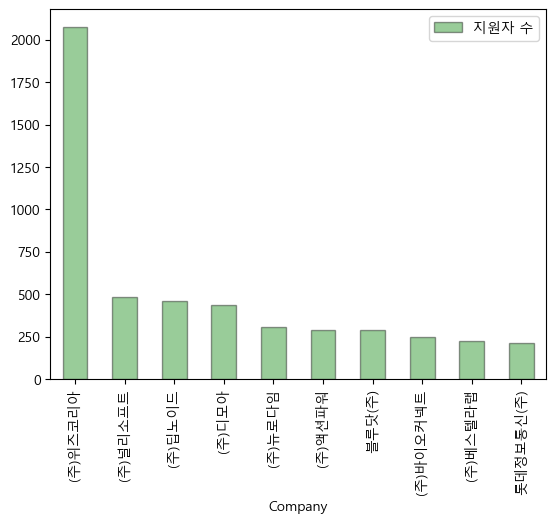

In [8]:
top10_ = df[:10]

# DataFrame 생성 및 저장 (그대로 사용)
df = pd.DataFrame(company_list, columns=["Company", "Location", "Career", "School", "Job1", "Job2", "Job3", "Job4", "Job5"])
top10_ = df[:10]
top10_['지원자 수'] = html_List

csv_filename = 'project_1.csv'
df.to_csv(csv_filename, index=False, encoding='utf-8')
top10_.to_csv('top10_.csv',index=False, encoding='utf-8' )
print("Data saved to", csv_filename)

print(top10_.plot.bar(x='Company', y = '지원자 수', color= 'green', alpha = 0.4, edgecolor = 'black'))

In [9]:
top30_ = df[:30]

# DataFrame 생성 및 저장 (그대로 사용)
# df = pd.DataFrame(company_list, columns=["Company", "Location", "Career", "School", "Job1", "Job2", "Job3", "Job4", "Job5"])
top30_ = df[:30]
top30_['지원자 수'] = html_List_30

csv_filename = 'Top30.csv'
# df.to_csv(csv_filename, index=False, encoding='utf-8')
top30_.to_csv(csv_filename,index=False, encoding='utf-8' )
# print("Data saved to", csv_filename

print(top30_)

        Company   Location           Career     School      Job1         Job2  \
0      (주)위즈코리아   서울 강서구 외  신입 · 경력 · 정규직 외       학력무관  백엔드/서버개발          웹개발   
1      (주)널리소프트  서울 영등포구 외       경력무관 · 정규직       학력무관  백엔드/서버개발          앱개발   
2       (주)딥노이드   서울 구로구 외    신입 · 경력 · 정규직       학력무관    데이터분석가      데이터엔지니어   
3        (주)디모아     서울 용산구    신입 · 경력 · 정규직       학력무관   데이터엔지니어         유지보수   
4       (주)뉴로다임   서울 성동구 외    신입 · 경력 · 정규직   대학교(4년)↑    데이터분석가  SE(시스템엔지니어)   
5       (주)액션파워     서울전체 외    신입 · 경력 · 정규직        석사↑    데이터분석가          웹개발   
6        블루닷(주)   서울 강남구 외    신입 · 경력 · 정규직   대학교(4년)↑    데이터분석가         네트워크   
7     (주)바이오커넥트     서울전체 외    신입 · 경력 · 정규직   대학교(4년)↑    데이터분석가          딥러닝   
8      (주)베스텔라랩   서울 마포구 외     1 ~ 7년 · 정규직  대학(2,3년)↑    데이터분석가     백엔드/서버개발   
9     롯데정보통신(주)     서울전체 외     3 ~ 9년 · 정규직   대학교(4년)↑    데이터분석가      데이터엔지니어   
10     (주)베스텔라랩     대구전체 외    신입 · 경력 · 정규직  대학(2,3년)↑  백엔드/서버개발          앱개발   
11     ㈜해커스교육그룹     서울 서초구  

C:\Users\user\AppData\Local\Temp\ipykernel_12836\3666835610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_['지원자 수'] = html_List_30


In [10]:
df.head(10)

,Company,Location,Career,School,Job1,Job2,Job3,Job4,Job5
0,(주)위즈코리아,서울 강서구 외,신입 · 경력 · 정규직 외,학력무관,백엔드/서버개발,웹개발,정보보안,퍼블리셔,프론트엔드
1,(주)널리소프트,서울 영등포구 외,경력무관 · 정규직,학력무관,백엔드/서버개발,앱개발,웹개발,빅데이터,알고리즘
2,(주)딥노이드,서울 구로구 외,신입 · 경력 · 정규직,학력무관,데이터분석가,데이터엔지니어,백엔드/서버개발,보안컨설팅,웹개발
3,(주)디모아,서울 용산구,신입 · 경력 · 정규직,학력무관,데이터엔지니어,유지보수,SE(시스템엔지니어),빅데이터,클라우드
4,(주)뉴로다임,서울 성동구 외,신입 · 경력 · 정규직,대학교(4년)↑,데이터분석가,SE(시스템엔지니어),딥러닝,머신러닝,블록체인
5,(주)액션파워,서울전체 외,신입 · 경력 · 정규직,석사↑,데이터분석가,웹개발,SE(시스템엔지니어),딥러닝,머신러닝
6,블루닷(주),서울 강남구 외,신입 · 경력 · 정규직,대학교(4년)↑,데이터분석가,네트워크,딥러닝,머신러닝,블록체인
7,(주)바이오커넥트,서울전체 외,신입 · 경력 · 정규직,대학교(4년)↑,데이터분석가,딥러닝,머신러닝,블록체인,빅데이터
8,(주)베스텔라랩,서울 마포구 외,1 ~ 7년 · 정규직,"대학(2,3년)↑",데이터분석가,백엔드/서버개발,웹개발,프론트엔드,SE(시스템엔지니어)
9,롯데정보통신(주),서울전체 외,3 ~ 9년 · 정규직,대학교(4년)↑,데이터분석가,데이터엔지니어,SE(시스템엔지니어),데이터마이닝,데이터시각화


In [11]:
df.tail(5)

,Company,Location,Career,School,Job1,Job2,Job3,Job4,Job5
89,(주)크리에이티브소프트,서울 동작구,신입 · 경력 · 정규직 외,"대학(2,3년)↑",백엔드/서버개발,웹개발,프론트엔드,HTML,MariaDB
90,(주)안티그래비티,서울 성동구 외,3 ~ 20년 · 정규직,석사↑,데이터분석가,딥러닝,머신러닝,블록체인,빅데이터
91,(주)인터엑스,서울전체 외,신입 · 경력 · 정규직,학력무관,모의해킹,S/W,.NET,ASP,ASP.NET
92,(주)크리에이츠,서울 강남구 외,3 ~ 10년 · 정규직,학력무관,데이터분석가,딥러닝,머신러닝,블록체인,빅데이터
93,(주)크로커스,서울 강남구 외,2 ~ 7년 · 정규직,학력무관,데이터분석가,데이터엔지니어,백엔드/서버개발,웹개발,SE(시스템엔지니어)


In [12]:
top10_.head()

,Company,Location,Career,School,Job1,Job2,Job3,Job4,Job5,지원자 수
0,(주)위즈코리아,서울 강서구 외,신입 · 경력 · 정규직 외,학력무관,백엔드/서버개발,웹개발,정보보안,퍼블리셔,프론트엔드,2075
1,(주)널리소프트,서울 영등포구 외,경력무관 · 정규직,학력무관,백엔드/서버개발,앱개발,웹개발,빅데이터,알고리즘,484
2,(주)딥노이드,서울 구로구 외,신입 · 경력 · 정규직,학력무관,데이터분석가,데이터엔지니어,백엔드/서버개발,보안컨설팅,웹개발,459
3,(주)디모아,서울 용산구,신입 · 경력 · 정규직,학력무관,데이터엔지니어,유지보수,SE(시스템엔지니어),빅데이터,클라우드,438
4,(주)뉴로다임,서울 성동구 외,신입 · 경력 · 정규직,대학교(4년)↑,데이터분석가,SE(시스템엔지니어),딥러닝,머신러닝,블록체인,309


In [19]:
a=top10_[['Company','지원자 수']]

wc = a.set_index("Company")
num_list=wc.to_dict()
num=num_list['지원자 수']
print(num)


{'(주)위즈코리아': 2075, '(주)널리소프트': 484, '(주)딥노이드': 459, '(주)디모아': 438, '(주)뉴로다임': 309, '(주)액션파워': 291, '블루닷(주)': 289, '(주)바이오커넥트': 249, '(주)베스텔라랩': 223, '롯데정보통신(주)': 210}


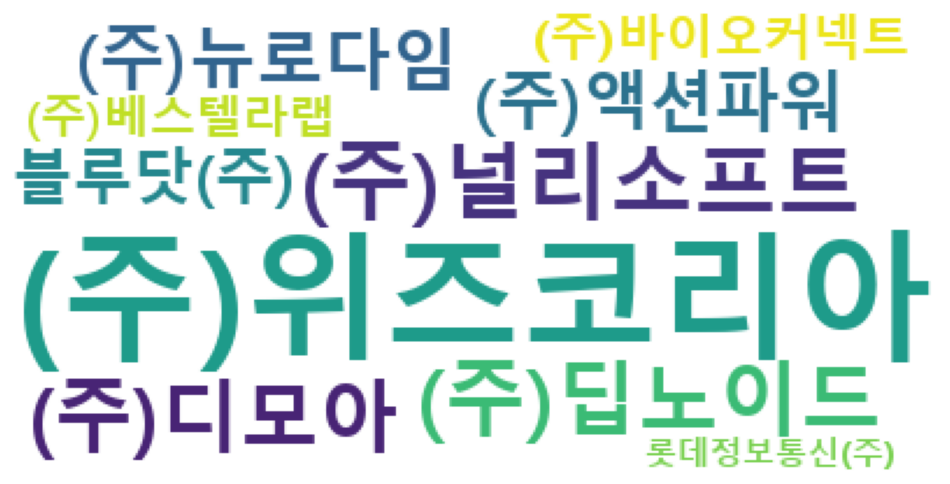

In [21]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform
# WordCloud를 생성
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다.
# macOS는 .otf , window는 .ttf 파일의 위치를 지정 (ex. '/Font/GodoM.otf')
if platform.system() == 'Windows':
    path = r'malgunbd.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(num)
# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [22]:
import stylecloud
stylecloud.gen_stylecloud(text=num,background_color='black', icon_name="fas fa-star", palette='colorbrewer.diverging.Spectral_11', font_path='C:/Users/user/Desktop/WEB_CROLLING/PROJECT/malgunbd.ttf')

In [14]:
b = top30_[['Company', '지원자 수']]
wc = b.set_index("Company")
num_list = wc.to_dict()
num = num_list['지원자 수']
print(num)

{'(주)위즈코리아': 2075, '(주)널리소프트': 484, '(주)딥노이드': 459, '(주)디모아': 438, '(주)뉴로다임': 309, '(주)액션파워': 291, '블루닷(주)': 289, '(주)바이오커넥트': 249, '(주)베스텔라랩': 210, '롯데정보통신(주)': 210, '㈜해커스교육그룹': 207, '(주)케이티넥스알': 199, '(주)미소정보기술': 178, '(주)마키나락스': 179, '㈜엘오티베큠': 174, '(주)엑셈': 172, '디딤365(주)': 171, '(주)푸드테크': 167, '(주)마크클라우드': 149, '(주)펀진': 150, '(주)바이브컴퍼니': 148, '메타빌드(주)': 148, '메디컬아이피(주)': 149, '(주)이랜드이노플': 150, '에이아이티스토리(주)': 144, '(주)피플펀드컴퍼니': 145, '(주)해줌': 142, '(주)11시11분': 124, '(주)데이터유니버스': 121}


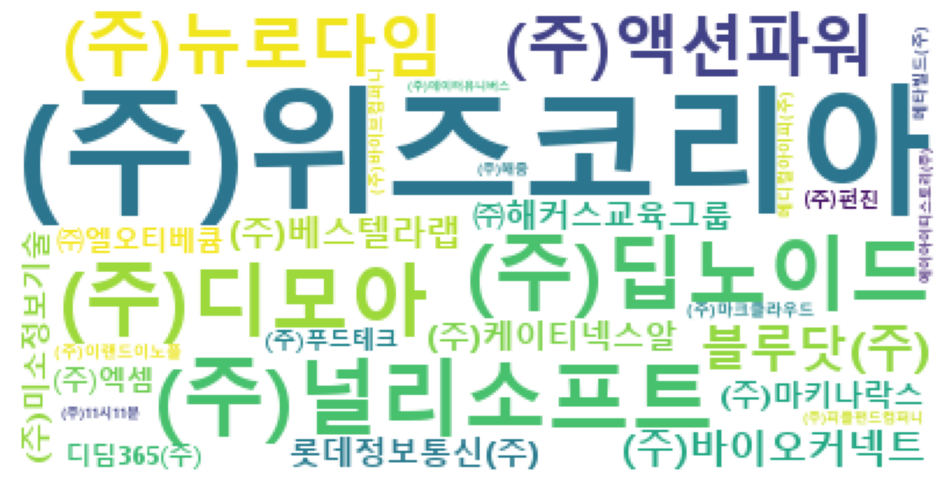

In [15]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform
# WordCloud를 생성
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다.
# macOS는 .otf , window는 .ttf 파일의 위치를 지정 (ex. '/Font/GodoM.otf')
if platform.system() == 'Windows':
    path = r'malgunbd.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(num)
# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [16]:
import stylecloud
stylecloud.gen_stylecloud(text=num,background_color='black', icon_name="fas fa-star", palette='colorbrewer.diverging.Spectral_11', font_path='C:/Users/user/Desktop/WEB_CROLLING/PROJECT/malgunbd.ttf')

In [18]:
import stylecloud
stylecloud.gen_stylecloud(text=num,background_color='black', icon_name="fas fa-star", palette='colorbrewer.diverging.Spectral_11', font_path='C:/Users/user/Desktop/WEB_CROLLING/PROJECT/malgunbd.ttf')